# EDA ANALYSIS

## CHECK OVERALL DATA


In [2]:
import pandas as pd

# 1) Load the parquet file
df = pd.read_parquet("airfoil_polars.parquet")

# 2) Quick overview of shape, dtypes, and memory
print("Shape:", df.shape)
print(df.info())

# 3) Peek at the first few rows
print(df.head())

# 4) Check for any missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 5) Count unique values in key categorical/numeric columns
print("\nUnique counts:")
print(df[['airfoil', 'Re', 'alpha']].nunique())

Shape: (175724, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175724 entries, 0 to 175723
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   alpha    175724 non-null  float64
 1   CL       175724 non-null  float64
 2   CD       175724 non-null  float64
 3   CDp      175724 non-null  float64
 4   CM       175724 non-null  float64
 5   Top_Xtr  175724 non-null  float64
 6   Bot_Xtr  175724 non-null  float64
 7   airfoil  175724 non-null  object 
 8   Re       175724 non-null  float64
dtypes: float64(8), object(1)
memory usage: 12.1+ MB
None
   alpha      CL       CD      CDp      CM  Top_Xtr  Bot_Xtr airfoil        Re
0  -2.00  0.4162  0.03433  0.02913 -0.1247   0.7980   0.1890   2032c  100000.0
1  -1.75  0.4447  0.03233  0.02696 -0.1252   0.7812   0.2189   2032c  100000.0
2  -1.00  0.5649  0.02599  0.01917 -0.1321   0.7264   0.1853   2032c  100000.0
3  -0.75  0.5806  0.02527  0.01864 -0.1302   0.7080   0.2629   2032c

In [3]:
# Define the numeric columns of interest
numeric_cols = ['alpha', 'CL', 'CD', 'CDp', 'CM', 'Top_Xtr', 'Bot_Xtr']

# 1) Overall descriptive stats
print("=== Overall summary ===")
print(df[numeric_cols].describe().T)

# 2) Descriptive stats grouped by Re
print("\n=== Summary by Reynolds number ===")
for Re_val in sorted(df['Re'].unique()):
    print(f"\n-- Re = {Re_val:.0e} --")
    print(df[df['Re'] == Re_val][numeric_cols].describe().T)

=== Overall summary ===
            count      mean       std      min       25%      50%      75%  \
alpha    175724.0  2.926732  2.947679 -2.00000  0.250000  3.00000  5.50000   
CL       175724.0  0.627707  0.396761 -0.81610  0.346075  0.64480  0.91530   
CD       175724.0  0.018427  0.012433  0.00022  0.011870  0.01554  0.02078   
CDp      175724.0  0.011363  0.012164 -0.00744  0.005230  0.00829  0.01301   
CM       175724.0 -0.063428  0.051115 -0.40980 -0.093500 -0.05960 -0.02480   
Top_Xtr  175724.0  0.567074  0.255678 -0.00160  0.407600  0.58990  0.75690   
Bot_Xtr  175724.0  0.837728  0.277620  0.01270  0.779300  1.00000  1.00000   

             max  
alpha    8.00000  
CL       1.98830  
CD       0.24006  
CDp      0.23137  
CM       0.12860  
Top_Xtr  1.00200  
Bot_Xtr  2.12740  

=== Summary by Reynolds number ===

-- Re = 1e+05 --
           count      mean       std      min       25%      50%      75%  \
alpha    58290.0  2.907497  2.941872 -2.00000  0.250000  2.75000  5.

## IDENTIFY BAD AIRFOIL WITH UNPHYSICAL DATA

In [4]:
# 1) Filter rows where Bot_Xtr > 2
bad_bot = df[df['Bot_Xtr'] > 2]

# 2) Show the offending rows (first few for inspection)
print("Rows with Bot_Xtr > 2:")
print(bad_bot.head())

# 3) List unique airfoils that have this issue
offending_airfoils = bad_bot['airfoil'].unique()
print(f"\nAirfoils with Bot_Xtr > 2 ({len(offending_airfoils)} total):")
print(offending_airfoils)

Rows with Bot_Xtr > 2:
        alpha      CL       CD      CDp      CM  Top_Xtr  Bot_Xtr  airfoil  \
169047  -2.00 -0.1411  0.03494  0.02980 -0.0239  -0.0010    2.001  ua79sfm   
169048  -1.75 -0.1389  0.03433  0.02909 -0.0227  -0.0010    2.001  ua79sfm   
169049  -1.50 -0.1361  0.03379  0.02845 -0.0215  -0.0010    2.001  ua79sfm   
169050  -1.25 -0.1330  0.03330  0.02787 -0.0203  -0.0010    2.001  ua79sfm   
169051  -1.00 -0.1174  0.03250  0.02694 -0.0205  -0.0006    2.001  ua79sfm   

              Re  
169047  100000.0  
169048  100000.0  
169049  100000.0  
169050  100000.0  
169051  100000.0  

Airfoils with Bot_Xtr > 2 (1 total):
['ua79sfm']


## COMPUTE THE NUMBER OF AIRFOIL WHICH HAVE ALL THE SIMULATION POINTS

In [5]:
# 1) Compute expected number of rows per airfoil
n_Re    = df['Re'].nunique()
n_alpha = df['alpha'].nunique()
expected = n_Re * n_alpha
print(f"Expected points per airfoil for “complete” coverage: {n_Re} Re × {n_alpha} α = {expected}\n")

# 2) Count rows per airfoil
counts = df.groupby('airfoil').size()

# 3) Find airfoils with exactly the expected count
complete_airfoils = counts[counts == expected].index.tolist()

# 4) Report
print(f"Found {len(complete_airfoils)} airfoils with complete coverage:\n")
print(complete_airfoils)

Expected points per airfoil for “complete” coverage: 3 Re × 41 α = 123

Found 186 airfoils with complete coverage:

['a18sm', 'ag03', 'ag04', 'ag12', 'ag16', 'ag19', 'ag23', 'ag36', 'ag44ct02r', 'ag455ct02r', 'ag47ct02r', 'ag52', 'ames01', 'ames02', 'amsoil2', 'b540ols', 'b737c', 'c5e', 'cal4014l', 'dae51', 'df102', 'dsma523b', 'e1230', 'e169', 'e171', 'e174', 'e178', 'e180', 'e186', 'e193', 'e201', 'e207', 'e210', 'e222', 'e224', 'e226', 'e228', 'e327', 'e333', 'e361', 'e374', 'e473', 'e477', 'e521', 'e560', 'e793', 'e854', 'ea61009', 'ea61012', 'eh0009', 'eh1590', 'eh2070', 'esa40', 'fx61147', 'fx63158', 'fx69h098', 'fx711525', 'fx73cl2152', 'giiie', 'giiig', 'giiih', 'giiii', 'goe144', 'goe362', 'goe386', 'goe409', 'goe459', 'goe507', 'goe533', 'goe549', 'goe553', 'goe600', 'goe622', 'goe624', 'goe655', 'goe673', 'goe676', 'goe765', 'goe767', 'hq1010', 'hq158', 'hq159', 'hq2010', 'hq208', 'hq209', 'hq258', 'hq3510', 'ht14', 'ht23', 'jx-gs-06', 'jx-gs-15', 'k2', 'kc135c', 'lds2', 'le

## SHOW HOW MANY AIRFOILS HAVE MISSING DATA 

Total airfoil–Re pairs: 4677
  • Complete (0 missing): 1967 (42.1%)
  • Few missing (1–5):    2035 (43.5%)
  • Many missing (>5):    675 (14.4%)


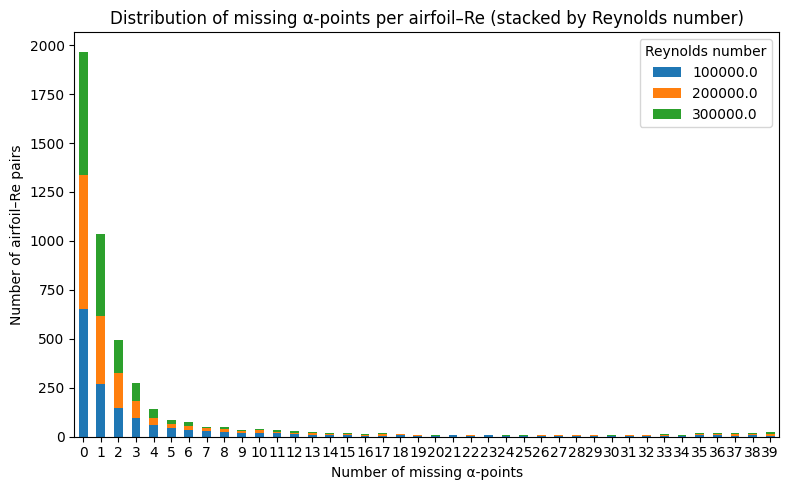


Top 10 pairs with most missing points:


,airfoil,Re,count,missing
3628,naca644421,100000.0,2,39
736,e342,200000.0,2,39
2906,jn153,200000.0,2,39
1657,goe16k,300000.0,2,39
1659,goe173,300000.0,2,39
2670,gu255118,300000.0,2,39
1302,fx67k150,200000.0,2,39
2123,goe440,200000.0,2,39
1434,fx78pk188,300000.0,2,39
1431,fx78k161,300000.0,2,39


In [9]:
import matplotlib.pyplot as plt

# 1. Compute counts & missing
expected_pts = 41
# Compute counts & missing per airfoil–Re pair
expected_pts = df['alpha'].nunique()
group_counts = df.groupby(['airfoil', 'Re'])['alpha'].count().reset_index(name='count')
group_counts['missing'] = expected_pts - group_counts['count']

# Create a pivot table of missing counts by Re
pivot_missing = group_counts.groupby(['missing', 'Re']).size().unstack(fill_value=0)

# 2. Summary text
total_pairs = len(group_counts)
complete     = (group_counts['missing'] == 0).sum()
few_missing  = ((group_counts['missing'] > 0) & (group_counts['missing'] <= 5)).sum()
many_missing = (group_counts['missing'] > 5).sum()

print(f"Total airfoil–Re pairs: {total_pairs}")
print(f"  • Complete (0 missing): {complete} ({complete/total_pairs:.1%})")
print(f"  • Few missing (1–5):    {few_missing} ({few_missing/total_pairs:.1%})")
print(f"  • Many missing (>5):    {many_missing} ({many_missing/total_pairs:.1%})")


# Plot stacked bar chart
ax = pivot_missing.plot(kind='bar', stacked=True, figsize=(8, 5))
ax.set_xlabel("Number of missing α‑points")
ax.set_ylabel("Number of airfoil–Re pairs")
ax.set_title("Distribution of missing α‑points per airfoil–Re (stacked by Reynolds number)")
ax.legend(title='Reynolds number')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Top 10 worst cases
worst = group_counts.sort_values('missing', ascending=False).head(10)
print("\nTop 10 pairs with most missing points:")
display(worst)

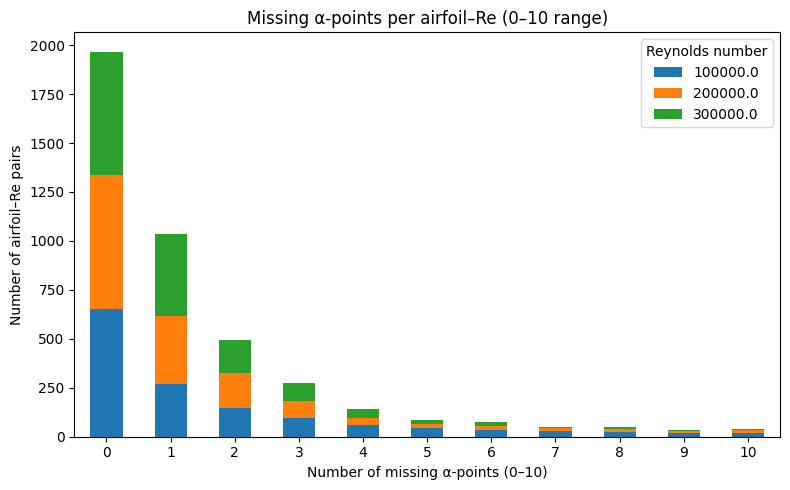

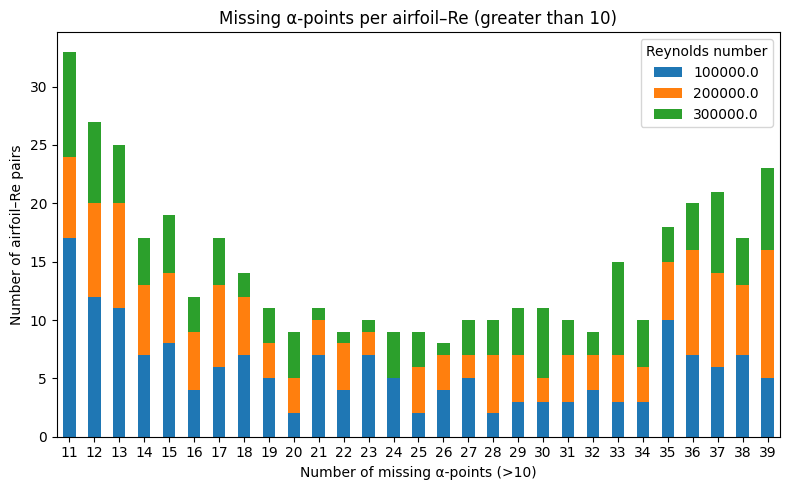

In [10]:
# Compute counts & missing per airfoil–Re pair
expected_pts = df['alpha'].nunique()
group_counts = (
    df.groupby(['airfoil', 'Re'])['alpha']
      .count()
      .reset_index(name='count')
)
group_counts['missing'] = expected_pts - group_counts['count']

# Pivot: rows = missing-count, cols = Re
pivot_missing = (
    group_counts
    .groupby(['missing', 'Re'])
    .size()
    .unstack(fill_value=0)
)

# Plot A: missing 0–10
pivot_missing.loc[0:10].plot(
    kind='bar', stacked=True, figsize=(8,5)
)
plt.xlabel("Number of missing α-points (0–10)")
plt.ylabel("Number of airfoil–Re pairs")
plt.title("Missing α-points per airfoil–Re (0–10 range)")
plt.xticks(rotation=0)
plt.legend(title='Reynolds number')
plt.tight_layout()
plt.show()

# Plot B: missing >10
pivot_missing.loc[11:].plot(
    kind='bar', stacked=True, figsize=(8,5)
)
plt.xlabel("Number of missing α-points (>10)")
plt.ylabel("Number of airfoil–Re pairs")
plt.title("Missing α-points per airfoil–Re (greater than 10)")
plt.xticks(rotation=0)
plt.legend(title='Reynolds number')
plt.tight_layout()
plt.show()

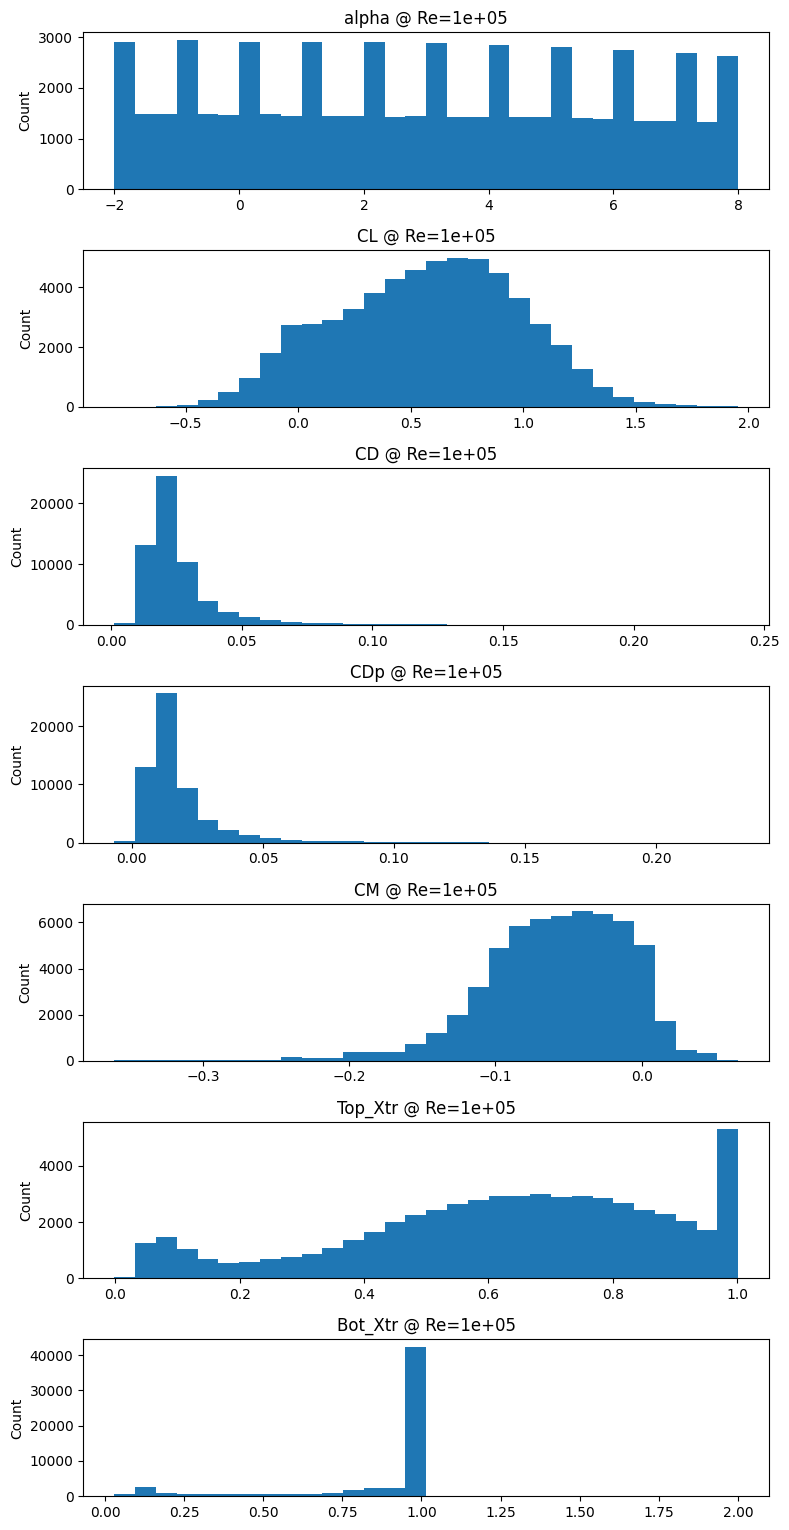

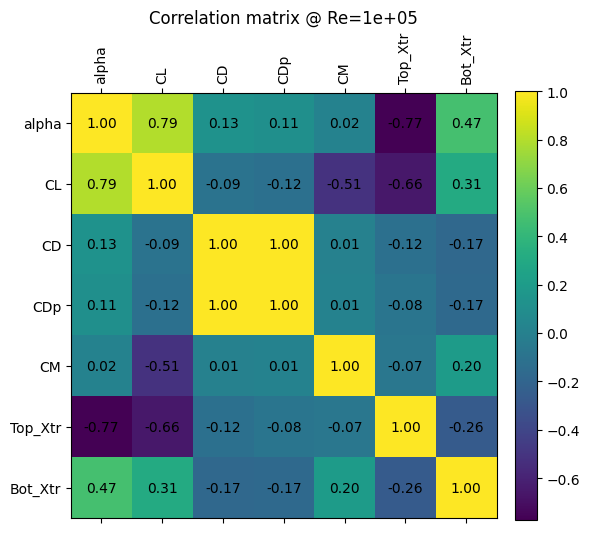

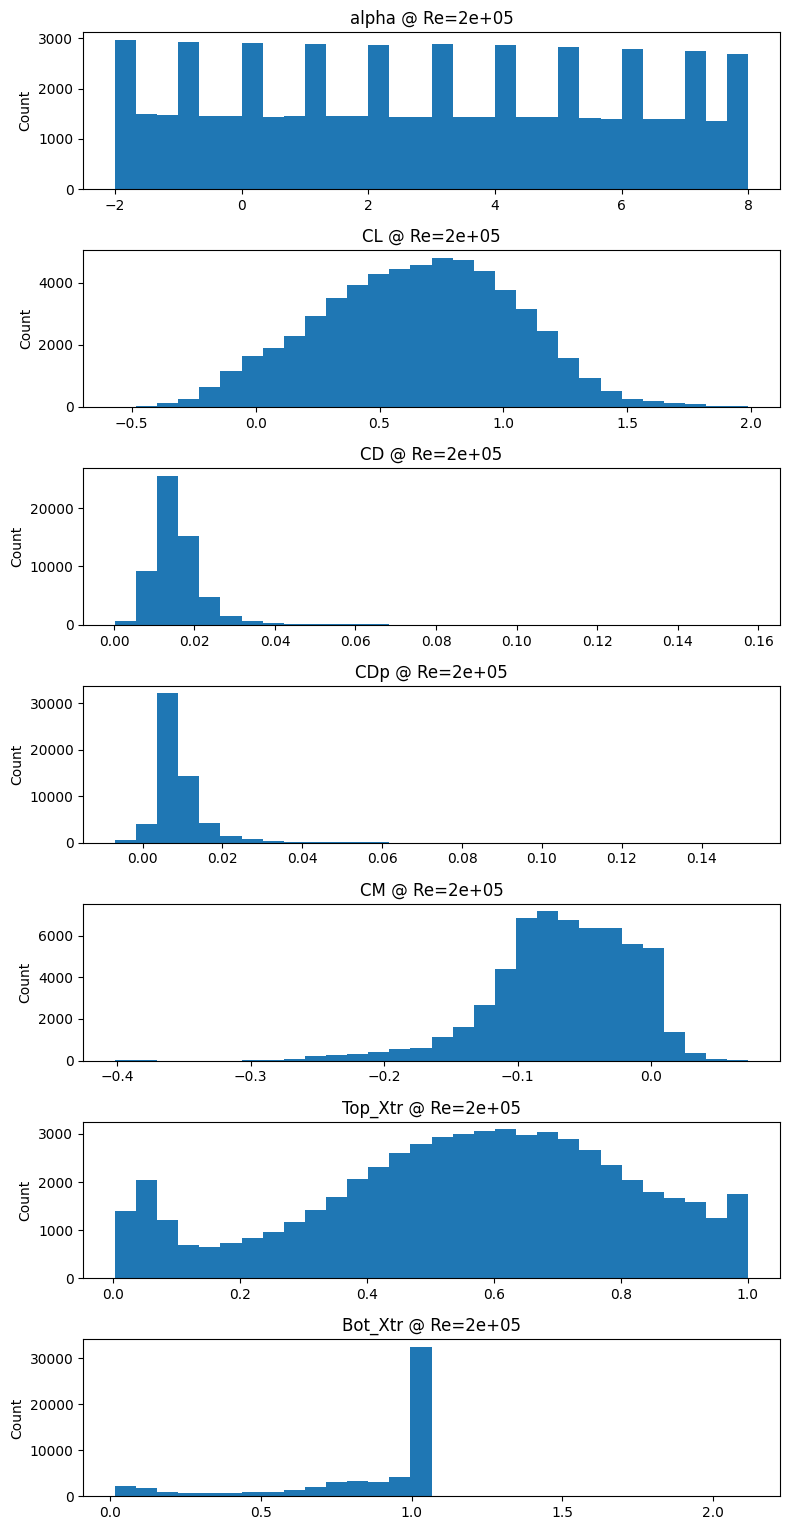

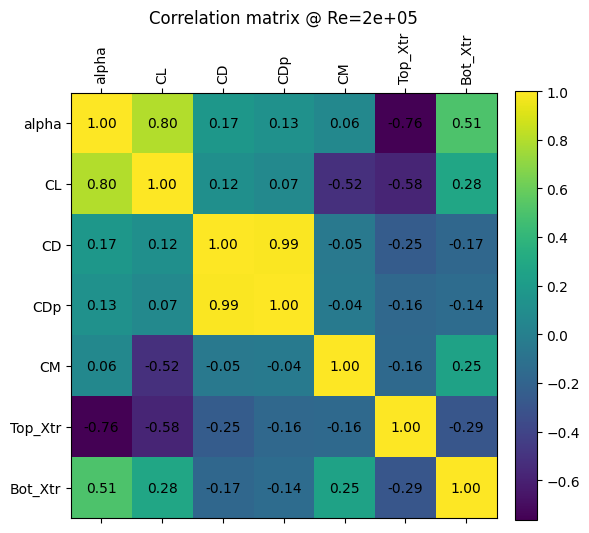

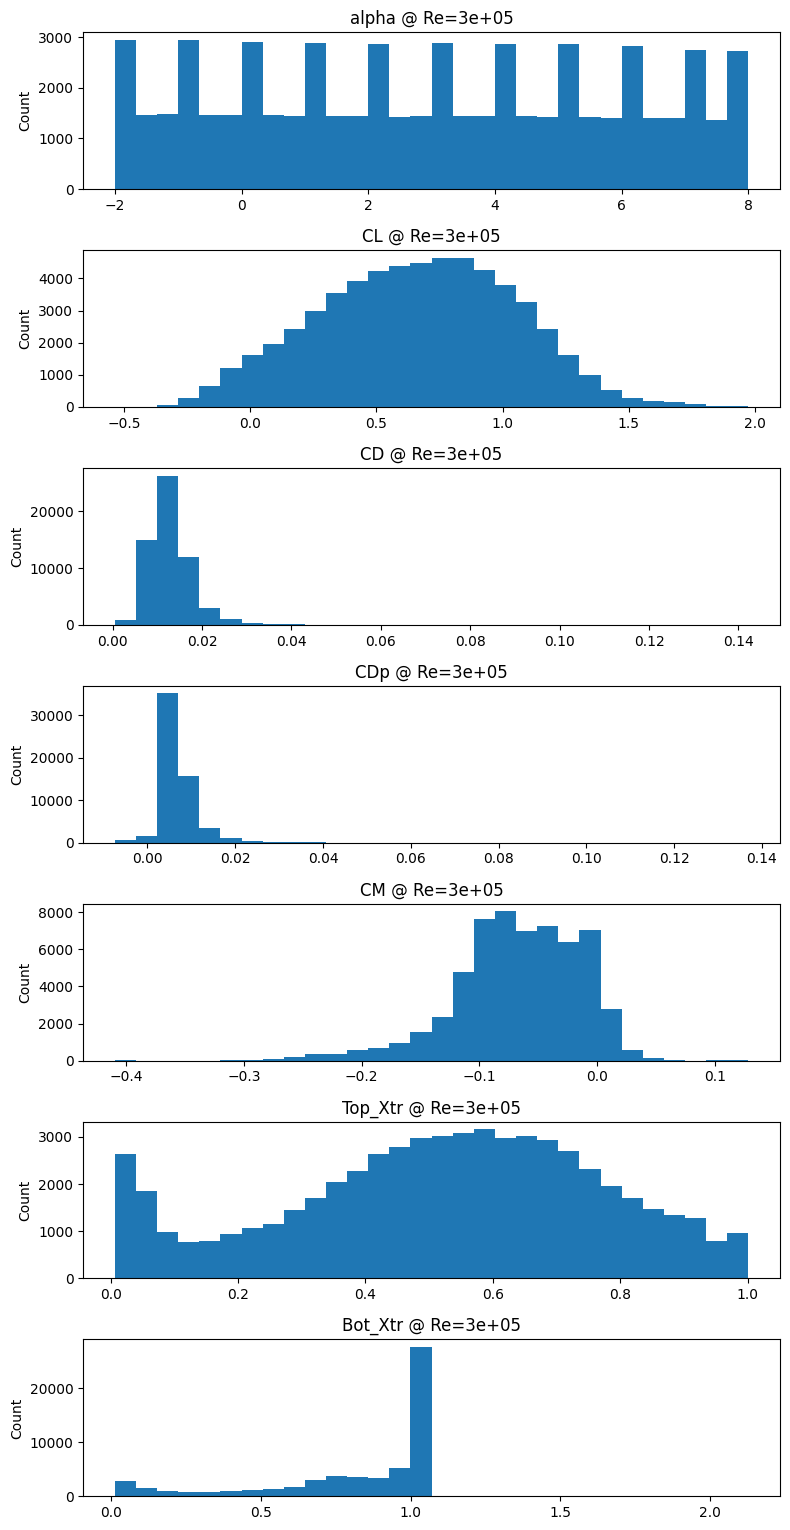

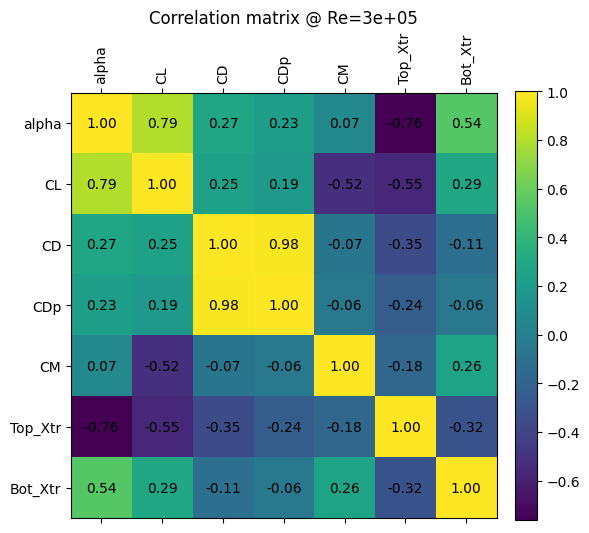

In [11]:
# Define numeric columns to inspect
numeric_cols = ['alpha', 'CL', 'CD', 'CDp', 'CM', 'Top_Xtr', 'Bot_Xtr']

for Re_val in sorted(df['Re'].unique()):
    sub = df[df['Re'] == Re_val]
    
    # 1) Histograms
    fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 2.2 * len(numeric_cols)))
    for ax, col in zip(axes, numeric_cols):
        ax.hist(sub[col], bins=30)
        ax.set_ylabel('Count')
        ax.set_title(f'{col} @ Re={Re_val:.0e}')
    plt.tight_layout()
    plt.show()
    
    # 2) Correlation matrix
    corr = sub[numeric_cols].corr()
    fig, ax = plt.subplots(figsize=(6, 6))
    cax = ax.matshow(corr)          # default colormap
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    
    # tick labels
    ax.set_xticks(np.arange(len(numeric_cols)))
    ax.set_yticks(np.arange(len(numeric_cols)))
    ax.set_xticklabels(numeric_cols, rotation=90)
    ax.set_yticklabels(numeric_cols)
    
    # annotate correlation coefficients
    for (i, j), val in np.ndenumerate(corr.values):
        ax.text(j, i, f'{val:.2f}', va='center', ha='center')
    
    ax.set_title(f'Correlation matrix @ Re={Re_val:.0e}')
    plt.tight_layout()
    plt.show()

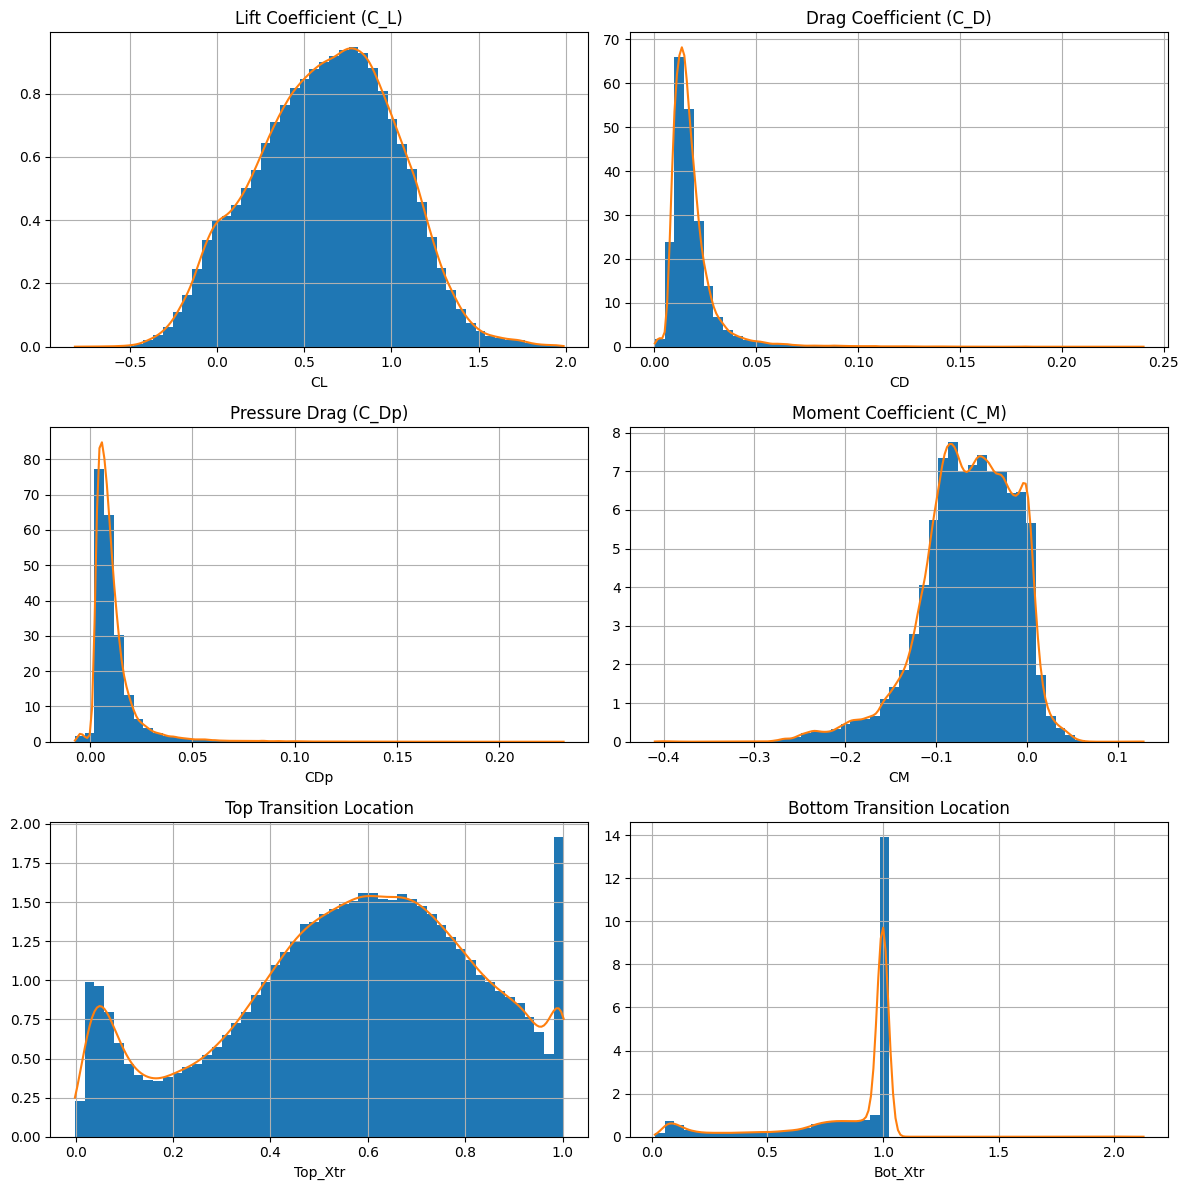

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1) Load your data; adjust if you only have CSV:
df = pd.read_parquet("airfoil_polars.parquet")  
# df = pd.read_csv("airfoil_polars.csv")  # fallback

# 2) Define variables and titles
vars_to_plot = ['CL','CD','CDp','CM','Top_Xtr','Bot_Xtr']
titles = {
    'CL': 'Lift Coefficient (C_L)',
    'CD': 'Drag Coefficient (C_D)',
    'CDp': 'Pressure Drag (C_Dp)',
    'CM': 'Moment Coefficient (C_M)',
    'Top_Xtr': 'Top Transition Location',
    'Bot_Xtr': 'Bottom Transition Location'
}

# 3) Create a 3×2 grid of histograms + KDEs
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for ax, var in zip(axes, vars_to_plot):
    data = df[var].dropna()
    # Histogram (density normalized)
    ax.hist(data, bins=50, density=True)
    # KDE overlay
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 200)
    ax.plot(x_vals, kde(x_vals))
    
    ax.set_title(titles[var])
    ax.set_xlabel(var)
    ax.grid(True)

plt.tight_layout()
plt.show()


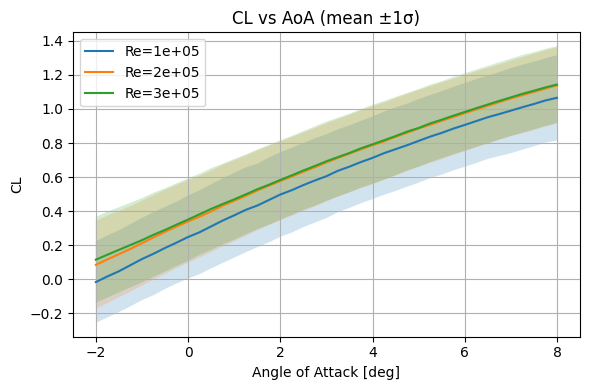

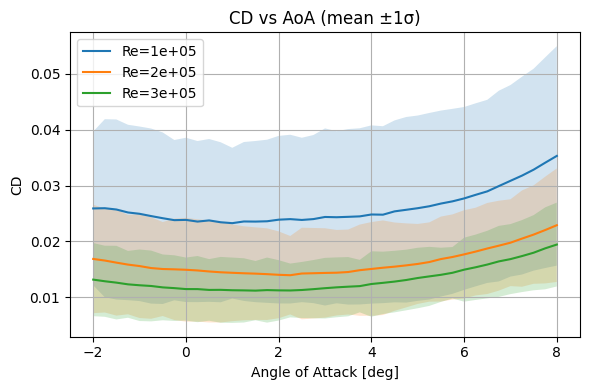

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define outputs to plot
for coef in ['CL','CD']:
    plt.figure(figsize=(6,4))
    for Re_val in sorted(df['Re'].unique()):
        sub = df[df['Re']==Re_val]
        stats = sub.groupby('alpha')[coef] \
                   .agg(['mean','std']) \
                   .reset_index()
        α = stats['alpha']
        μ = stats['mean']
        σ = stats['std']

        # mean curve
        plt.plot(α, μ, label=f'Re={Re_val:.0e}')
        # shading ±1σ
        plt.fill_between(α, μ-σ, μ+σ, alpha=0.2)

    plt.xlabel('Angle of Attack [deg]')
    plt.ylabel(f'{coef}')
    plt.title(f'{coef} vs AoA (mean ±1σ)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Re = 1e+05 → C_D0 = 0.0292, k1 = -0.0126, k2 = 0.0080
Re = 2e+05 → C_D0 = 0.0161, k1 = -0.0064, k2 = 0.0079
Re = 3e+05 → C_D0 = 0.0117, k1 = -0.0023, k2 = 0.0056


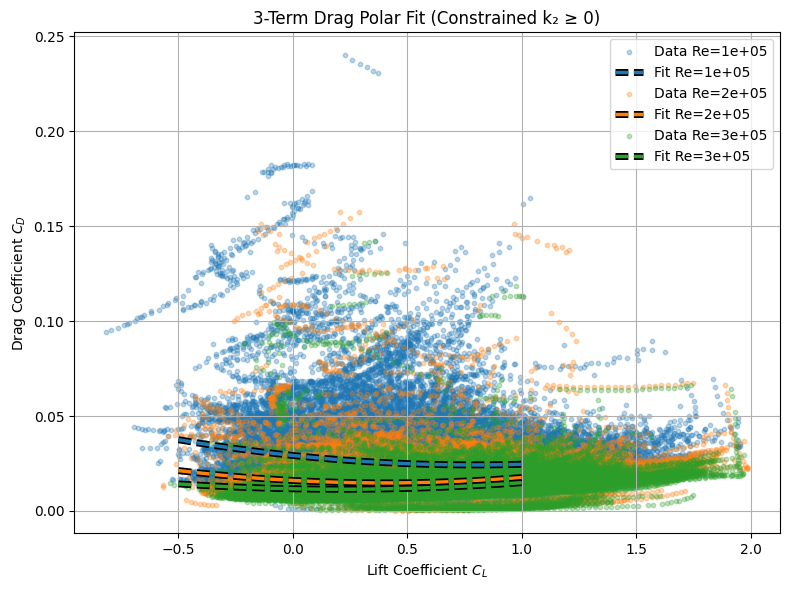

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import matplotlib.patheffects as pe


# Prepare for fitting & plotting
Re_values = sorted(df['Re'].unique())
colors = {Re_values[i]: f"C{i}" for i in range(len(Re_values))}
CL_min, CL_max = -0.5, 1.0
CL_range = np.linspace(CL_min, CL_max, 300)

# Fit constrained 3-term polar: CD = C_D0 + k1*CL + k2*CL^2 with k2>=0
def residuals(params, CL, CD):
    C_D0, k1, k2_param = params
    k2 = k2_param ** 2
    return (C_D0 + k1 * CL + k2 * CL**2) - CD

fit_results = {}
for Re_val in Re_values:
    sub = df[df['Re'] == Re_val]
    mask = (sub['CL'] >= CL_min) & (sub['CL'] <= CL_max)
    CL = sub.loc[mask, 'CL'].values
    CD = sub.loc[mask, 'CD'].values

    x0 = [np.median(CD), 0.0, np.sqrt(0.05)]
    res = least_squares(residuals, x0, args=(CL, CD))
    C_D0_fit, k1_fit, k2_fit = res.x[0], res.x[1], res.x[2]**2

    fit_results[Re_val] = dict(C_D0=C_D0_fit, k1=k1_fit, k2=k2_fit)
    print(f"Re = {Re_val:.0e} → C_D0 = {C_D0_fit:.4f}, k1 = {k1_fit:.4f}, k2 = {k2_fit:.4f}")

# Plot scatter and 3-term fit with black outlines
plt.figure(figsize=(8,6))
for Re_val in Re_values:
    sub = df[df['Re'] == Re_val]
    plt.scatter(
        sub['CL'], sub['CD'],
        s=10, alpha=0.3,
        color=colors[Re_val],
        label=f'Data Re={Re_val:.0e}'
    )

    # Compute fitted curve
    coeffs = fit_results[Re_val]
    CD_fit = coeffs['C_D0'] + coeffs['k1']*CL_range + coeffs['k2']*CL_range**2

    # Plot with a black stroke for better visibility
    line = plt.plot(
        CL_range, CD_fit,
        color=colors[Re_val],
        linewidth=2.5,
        linestyle='--',
        label=f'Fit Re={Re_val:.0e}'
    )[0]
    line.set_path_effects([
        pe.Stroke(linewidth=5, foreground='black'),
        pe.Normal()
    ])

plt.xlabel('Lift Coefficient $C_L$')
plt.ylabel('Drag Coefficient $C_D$')
plt.title('3-Term Drag Polar Fit (Constrained k₂ ≥ 0)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Z0219327\AppData\Local\Temp\ipykernel_17516\2757783656.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.polyfit(g['alpha'], g['CL'], 1)[0])


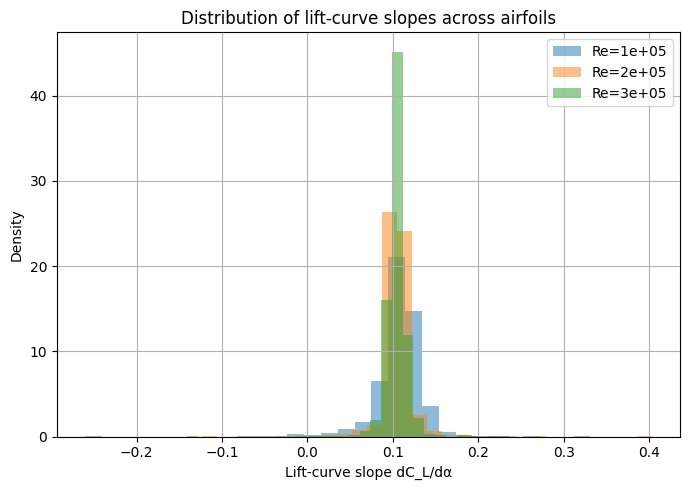

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Compute slopes per airfoil & Re
slopes = (
    df
    .groupby(['airfoil','Re'])
    .apply(lambda g: np.polyfit(g['alpha'], g['CL'], 1)[0])
    .reset_index(name='CL_slope')
)

# Plot histograms of slopes by Re
plt.figure(figsize=(7,5))
for Re_val in sorted(df['Re'].unique()):
    subset = slopes[slopes['Re']==Re_val]['CL_slope']
    plt.hist(subset, bins=30, alpha=0.5, density=True,
             label=f'Re={Re_val:.0e}')
plt.xlabel('Lift‐curve slope dC_L/dα')
plt.ylabel('Density')
plt.title('Distribution of lift‐curve slopes across airfoils')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

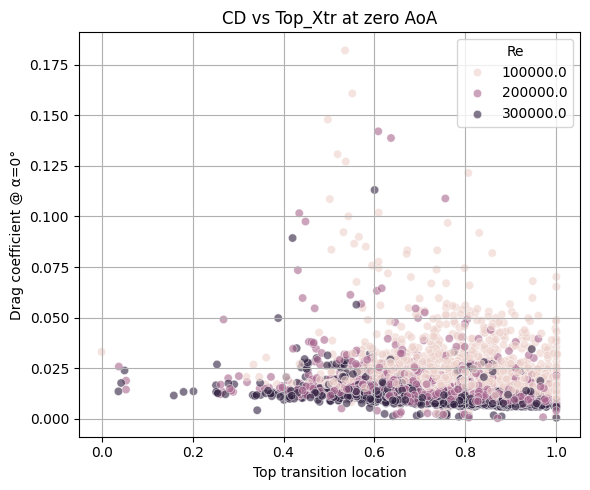

In [25]:
import seaborn as sns

# pick α=0° slice
slice0 = df[df['alpha']==0.0]

plt.figure(figsize=(6,5))
sns.scatterplot(data=slice0, x='Top_Xtr', y='CD',
                hue='Re', alpha=0.6)
plt.xlabel('Top transition location')
plt.ylabel('Drag coefficient @ α=0°')
plt.title('CD vs Top_Xtr at zero AoA')
plt.grid(True)
plt.tight_layout()
plt.show()

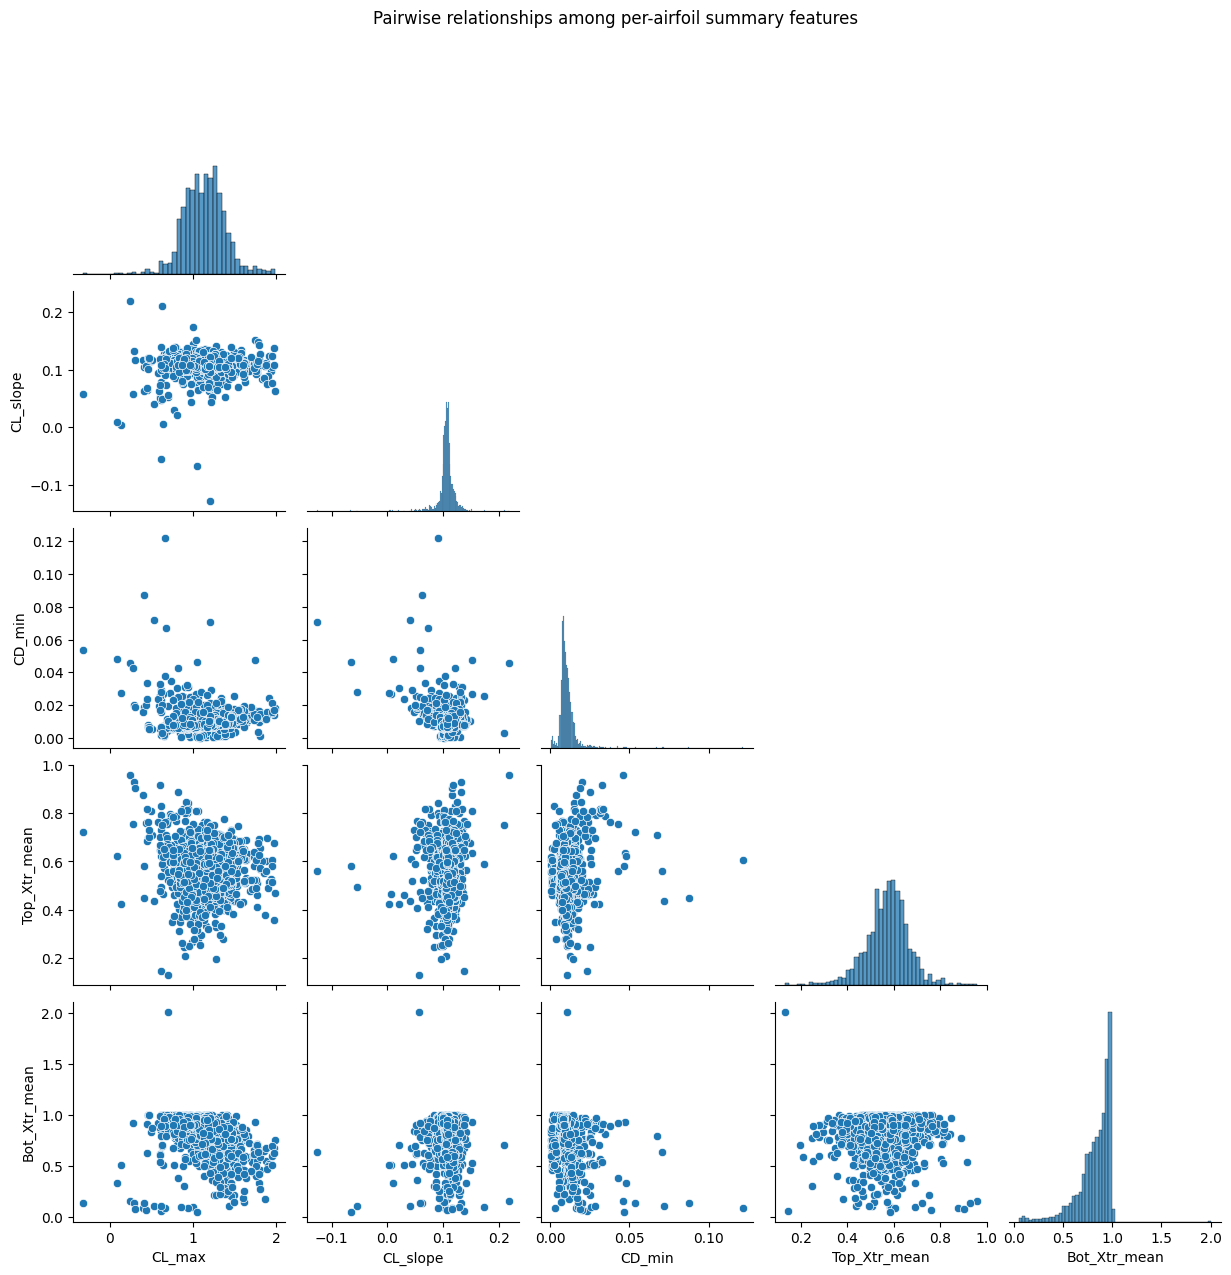

In [26]:
import seaborn as sns

# build summary table (one row per airfoil)
summary = (
    df
    .groupby('airfoil')
    .agg({
        'CL': ['max', lambda x: np.polyfit(df.loc[x.index,'alpha'], x, 1)[0]],
        'CD': 'min',
        'Top_Xtr': 'mean',
        'Bot_Xtr': 'mean'
    })
)
summary.columns = ['CL_max', 'CL_slope', 'CD_min', 'Top_Xtr_mean', 'Bot_Xtr_mean']
summary = summary.reset_index()

sns.pairplot(summary.drop(columns='airfoil'), corner=True)
plt.suptitle('Pairwise relationships among per-airfoil summary features', y=1.02)
plt.show()

Re = 1e+05 → C_D0 = 0.0292,  k1 = -0.0126,  k2 = 0.0080
Re = 2e+05 → C_D0 = 0.0161,  k1 = -0.0064,  k2 = 0.0079
Re = 3e+05 → C_D0 = 0.0117,  k1 = -0.0023,  k2 = 0.0056


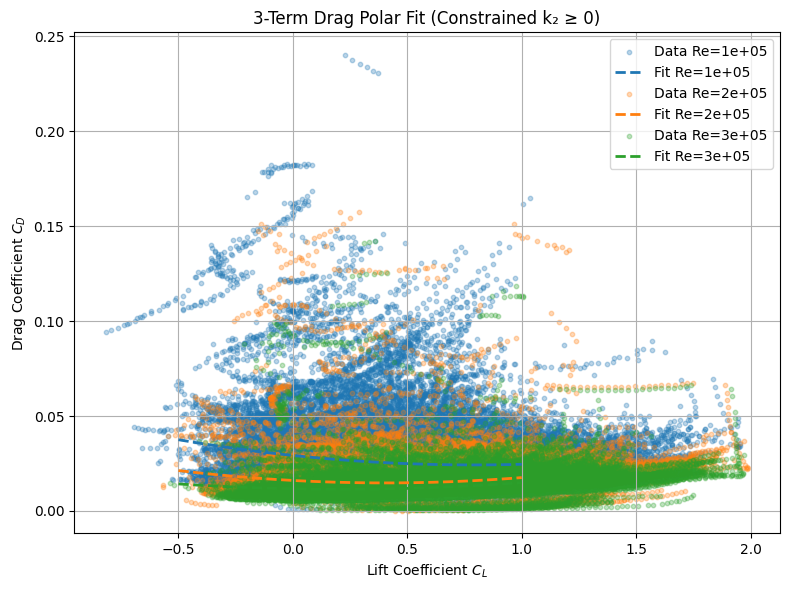

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Prepare for fitting & plotting
Re_values = sorted(df['Re'].unique())
colors    = {Re_values[i]: f"C{i}" for i in range(len(Re_values))}
CL_min, CL_max = -0.5, 1.0  # CL fitting range
CL_range  = np.linspace(CL_min, CL_max, 300)

# Storage for fitted coefficients
fit_results = {}

# Fit a constrained 3-term polar: CD = C_D0 + k1*CL + k2*CL^2 with k2>=0
def residuals(params, CL, CD):
    C_D0, k1, k2_param = params
    k2 = k2_param**2  # enforce non-negative k2
    CD_pred = C_D0 + k1*CL + k2*CL**2
    return CD_pred - CD

for Re_val in Re_values:
    sub = df[df['Re'] == Re_val]
    # Restrict to a CL range to avoid stall and negative-lift extremes
    mask = (sub['CL'] >= CL_min) & (sub['CL'] <= CL_max)
    CL = sub.loc[mask, 'CL'].values
    CD = sub.loc[mask, 'CD'].values

    # Initial guesses: C_D0 ~ median CD, k1 ~ 0, k2 ~ 0.05
    x0 = [np.median(CD), 0.0, np.sqrt(0.05)]
    res = least_squares(residuals, x0, args=(CL, CD))

    C_D0_fit = res.x[0]
    k1_fit   = res.x[1]
    k2_fit   = res.x[2]**2  # squared back

    fit_results[Re_val] = {
        'C_D0': C_D0_fit,
        'k1': k1_fit,
        'k2': k2_fit
    }
    print(f"Re = {Re_val:.0e} → C_D0 = {C_D0_fit:.4f},  k1 = {k1_fit:.4f},  k2 = {k2_fit:.4f}")

# Plot scatter and 3-term fit for each Re
plt.figure(figsize=(8, 6))
for Re_val in Re_values:
    sub = df[df['Re'] == Re_val]
    plt.scatter(sub['CL'], sub['CD'],
                s=10, alpha=0.3,
                color=colors[Re_val],
                label=f'Data Re={Re_val:.0e}')

    # Compute fitted CD over CL_range
    coeffs = fit_results[Re_val]
    CD_fit = coeffs['C_D0'] + coeffs['k1']*CL_range + coeffs['k2']*CL_range**2
    plt.plot(CL_range, CD_fit,
             color=colors[Re_val],
             linestyle='--',
             linewidth=2.0,
             label=f'Fit Re={Re_val:.0e}')

plt.xlabel('Lift Coefficient $C_L$')
plt.ylabel('Drag Coefficient $C_D$')
plt.title('3-Term Drag Polar Fit (Constrained k₂ ≥ 0)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Constrained 3-term fit at Re=1e+05:
  C_D0 = 0.0292
  k1   = -0.0126
  k2   = 0.0080   (forced non-negative)


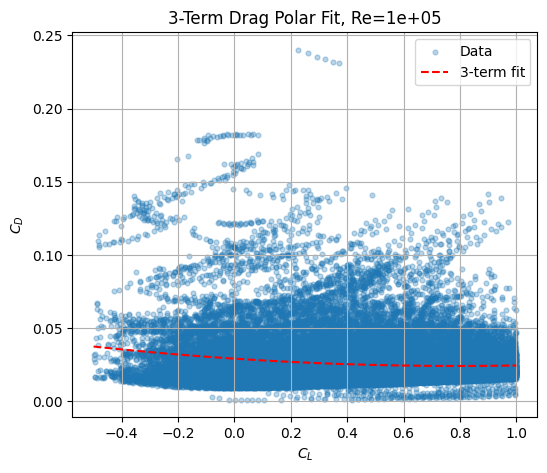

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# choose one Re for illustration
Re_val = 1e5
sub = df[df['Re'] == Re_val].copy()

# restrict to CL range, e.g. [-0.5, 1.0]
mask = (sub['CL'] > -0.5) & (sub['CL'] < 1.0)
CL = sub.loc[mask, 'CL'].values
CD = sub.loc[mask, 'CD'].values

# define residuals for C_D0, k1, k2, with k2 forced >= 0 via parameter transform
def residuals(params, CL, CD):
    C_D0, k1, k2_param = params
    k2 = k2_param**2  # ensures k2 >= 0
    CD_pred = C_D0 + k1*CL + k2*(CL**2)
    return CD_pred - CD

# initial guess
x0 = [0.01, 0.0, np.sqrt(0.05)]  # sqrt of initial k2 guess

res = least_squares(residuals, x0, args=(CL, CD))
C_D0_fit, k1_fit, k2_fit = res.x[0], res.x[1], res.x[2]**2

print(f"Constrained 3-term fit at Re={Re_val:.0e}:")
print(f"  C_D0 = {C_D0_fit:.4f}")
print(f"  k1   = {k1_fit:.4f}")
print(f"  k2   = {k2_fit:.4f}   (forced non-negative)")

# Plot to compare
CL_range = np.linspace(-0.5, 1.0, 200)
CD_fit = C_D0_fit + k1_fit*CL_range + k2_fit*CL_range**2

plt.figure(figsize=(6,5))
plt.scatter(CL, CD, s=12, alpha=0.3, label='Data')
plt.plot(CL_range, CD_fit, 'r--', label='3-term fit')
plt.xlabel('$C_L$')
plt.ylabel('$C_D$')
plt.title(f'3-Term Drag Polar Fit, Re={Re_val:.0e}')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
counts = df.groupby(['airfoil','Re'])['alpha'].count().unstack()
# how many airfoils have full coverage?
full = (counts == 41).all(axis=1).sum()
total = counts.shape[0]
print(f"{full}/{total} airfoils have all 41 α‐points at each Re.")
bad = counts[counts.min(axis=1) < 41]
print("Missing coverage for these airfoils:"); display(bad)
missing = df.isna().groupby([df.airfoil, df.Re]).sum()
# show any group with non-zero missing
bad_missing = missing[(missing[['CL','CD','CDp','CM','Top_Xtr','Bot_Xtr']]>0).any(axis=1)]
print("Airfoil–Re groups with missing values:"); display(bad_missing)

186/1619 airfoils have all 41 α‐points at each Re.
Missing coverage for these airfoils:


Re,100000.0,200000.0,300000.0
airfoil,,,
2032c,38.0,NaN,40.0
a18,41.0,39.0,40.0
a63a108c,41.0,40.0,41.0
ag08,39.0,41.0,41.0
ag09,40.0,41.0,40.0
...,...,...,...
ys900,21.0,18.0,NaN
ys915,33.0,29.0,27.0
ys920,NaN,31.0,28.0


Airfoil–Re groups with missing values:


,,alpha,CL,CD,CDp,CM,Top_Xtr,Bot_Xtr,airfoil,Re
airfoil,Re,,,,,,,,,


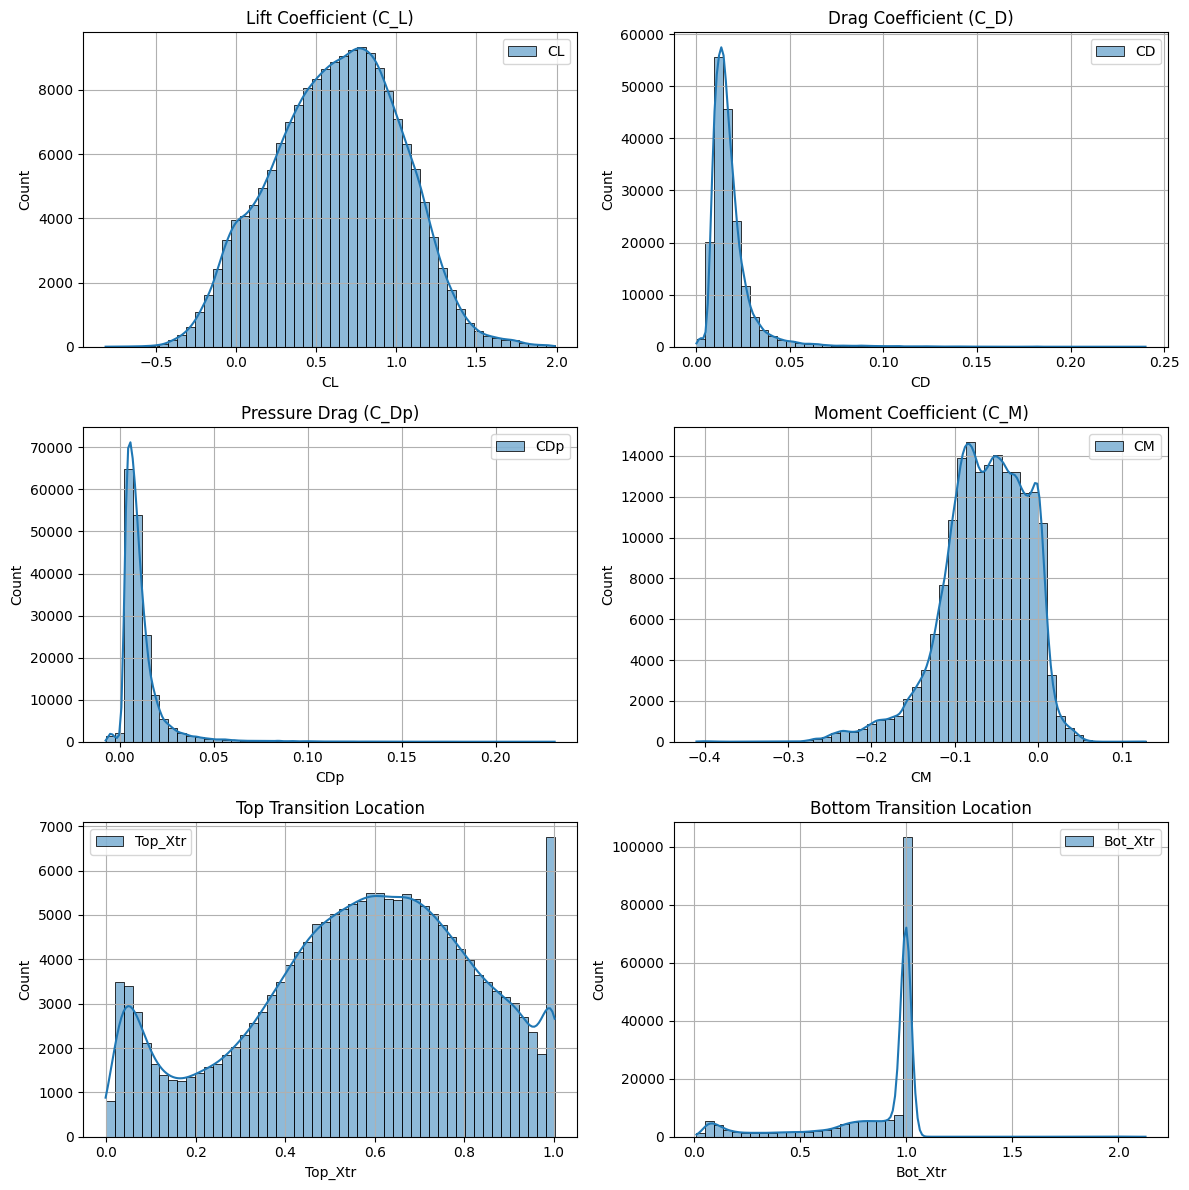

In [27]:
# Select the variables to plot
vars_to_plot = ['CL','CD','CDp','CM','Top_Xtr','Bot_Xtr']
titles = {
    'CL': 'Lift Coefficient (C_L)',
    'CD': 'Drag Coefficient (C_D)',
    'CDp':'Pressure Drag (C_Dp)',
    'CM': 'Moment Coefficient (C_M)',
    'Top_Xtr': 'Top Transition Location',
    'Bot_Xtr': 'Bottom Transition Location'
}

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for ax, var in zip(axes, vars_to_plot):
    sns.histplot(df[var], bins=50, kde=True, ax=ax, label=var)
    ax.set_title(titles[var])
    ax.set_xlabel(var)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

Total airfoil–Re pairs: 4677
  • Complete (0 missing): 1967 (42.1%)
  • Few missing (1–5):    2035 (43.5%)
  • Many missing (>5):    675 (14.4%)


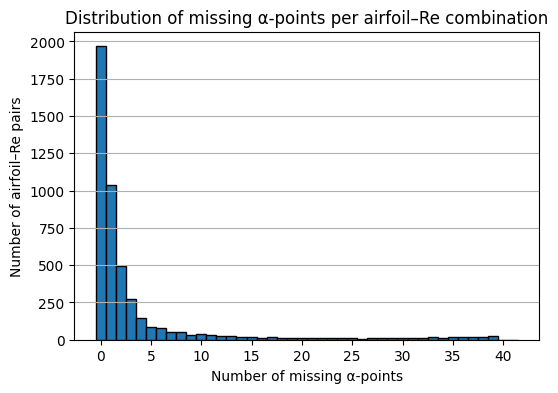


Top 10 pairs with most missing points:


,airfoil,Re,count,missing
3628,naca644421,100000.0,2,39
736,e342,200000.0,2,39
2906,jn153,200000.0,2,39
1657,goe16k,300000.0,2,39
1659,goe173,300000.0,2,39
2670,gu255118,300000.0,2,39
1302,fx67k150,200000.0,2,39
2123,goe440,200000.0,2,39
1434,fx78pk188,300000.0,2,39
1431,fx78k161,300000.0,2,39


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Compute counts & missing
expected_pts = 41
group_counts = df.groupby(['airfoil','Re'])['alpha'].count().reset_index(name='count')
group_counts['missing'] = expected_pts - group_counts['count']

# 2. Summary text
total_pairs = len(group_counts)
complete     = (group_counts['missing'] == 0).sum()
few_missing  = ((group_counts['missing'] > 0) & (group_counts['missing'] <= 5)).sum()
many_missing = (group_counts['missing'] > 5).sum()

print(f"Total airfoil–Re pairs: {total_pairs}")
print(f"  • Complete (0 missing): {complete} ({complete/total_pairs:.1%})")
print(f"  • Few missing (1–5):    {few_missing} ({few_missing/total_pairs:.1%})")
print(f"  • Many missing (>5):    {many_missing} ({many_missing/total_pairs:.1%})")

# 3. Histogram of missing counts
plt.figure(figsize=(6,4))
plt.hist(group_counts['missing'], bins=range(0, expected_pts+2), align='left', edgecolor='black')
plt.xlabel("Number of missing α‐points")
plt.ylabel("Number of airfoil–Re pairs")
plt.title("Distribution of missing α‐points per airfoil–Re combination")
plt.xticks(range(0, expected_pts+1, 5))
plt.grid(axis='y')
plt.show()

# 4. Top 10 worst cases
worst = group_counts.sort_values('missing', ascending=False).head(10)
print("\nTop 10 pairs with most missing points:")
display(worst)

192/1619 airfoils are 100% complete across all Re


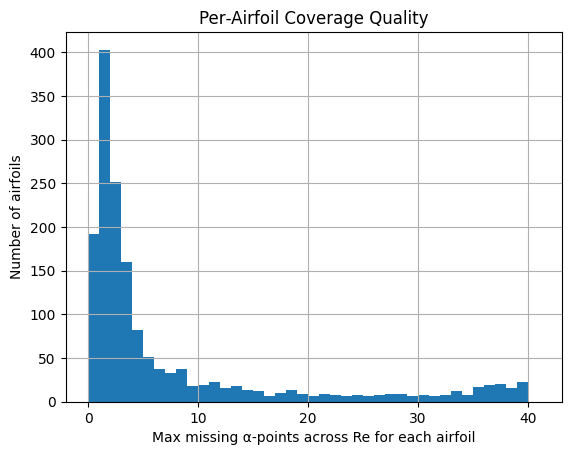

In [29]:
# 1) Per‐pair missing (4 857 rows)
group_counts = df.groupby(['airfoil','Re'])['alpha'].count().reset_index(name='count')
group_counts['missing'] = 41 - group_counts['count']

# 2) Per‐airfoil summary (1 619 rows)
airfoil_summary = group_counts.groupby('airfoil')['missing'].agg([
    ('max_missing','max'),
    ('mean_missing','mean'),
    ('all_complete', lambda g: (g==0).all())
]).reset_index()

# How many fully complete airfoils?
n_complete_af = airfoil_summary['all_complete'].sum()
total_af     = len(airfoil_summary)
print(f"{n_complete_af}/{total_af} airfoils are 100% complete across all Re")

# Show histogram of max_missing per airfoil
airfoil_summary['max_missing'].hist(bins=range(0,42))
plt.xlabel('Max missing α‐points across Re for each airfoil')
plt.ylabel('Number of airfoils')
plt.title('Per‐Airfoil Coverage Quality')
plt.show()

# And still keep the per‐pair histogram

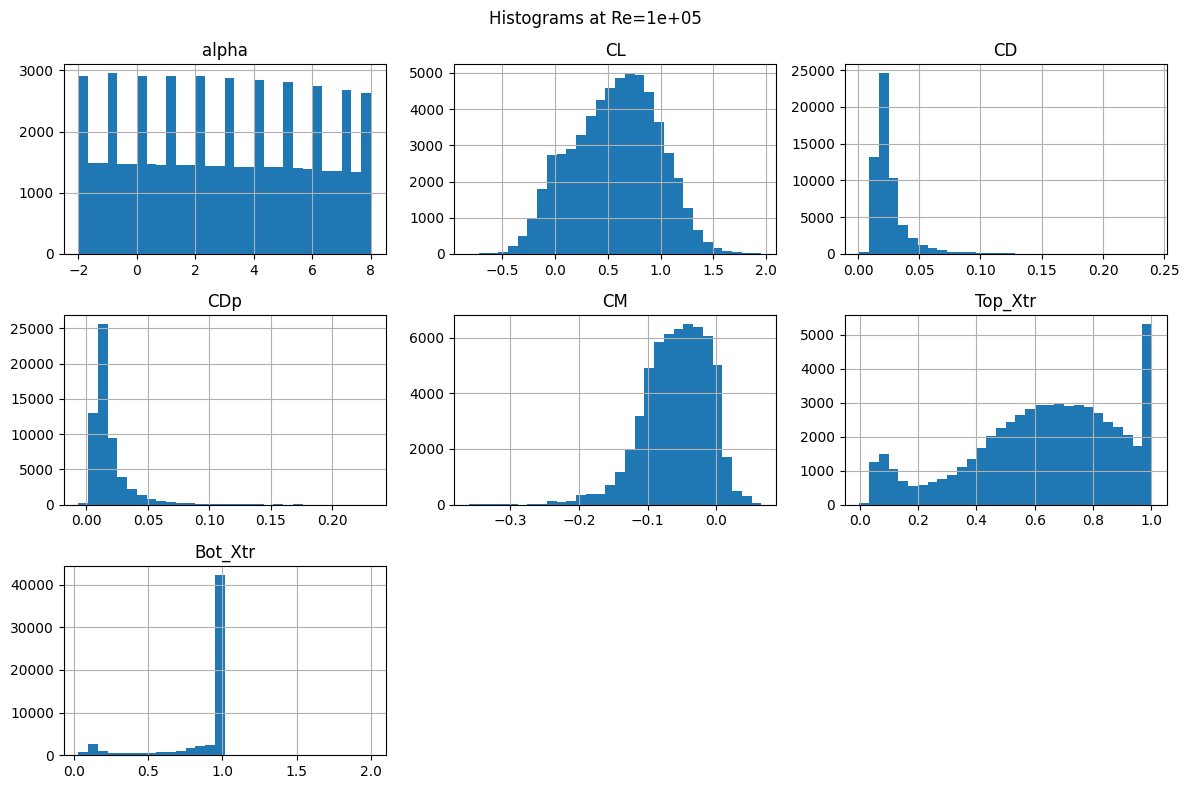

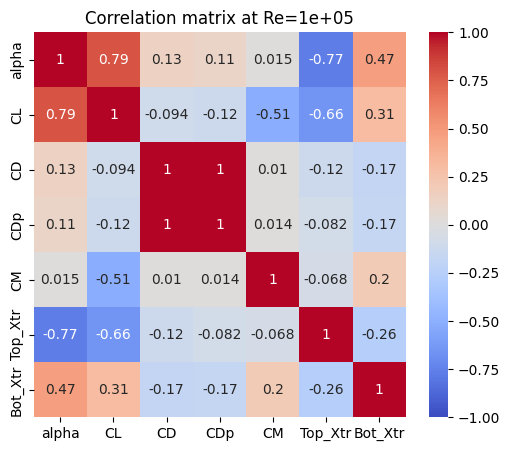

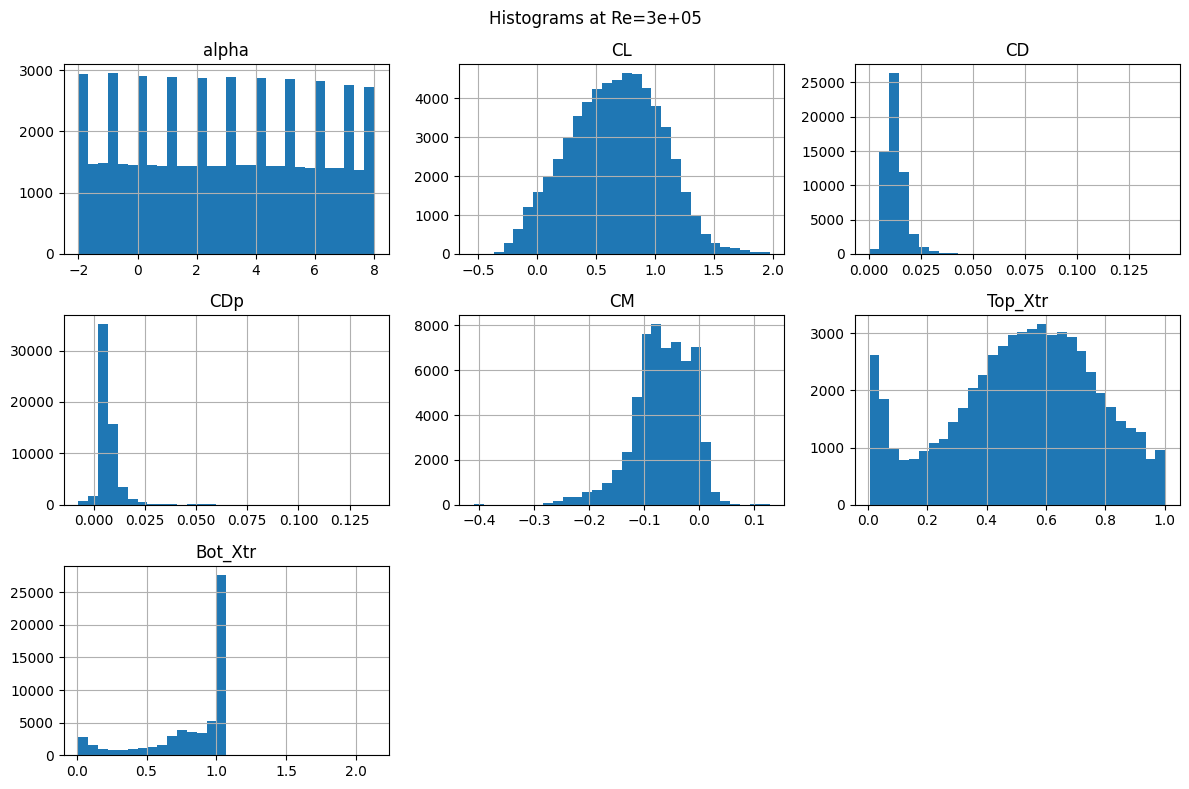

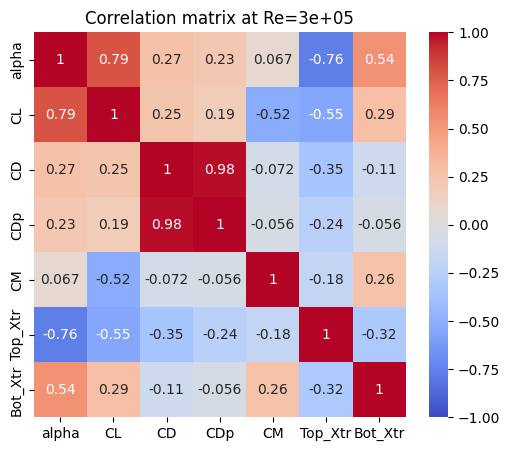

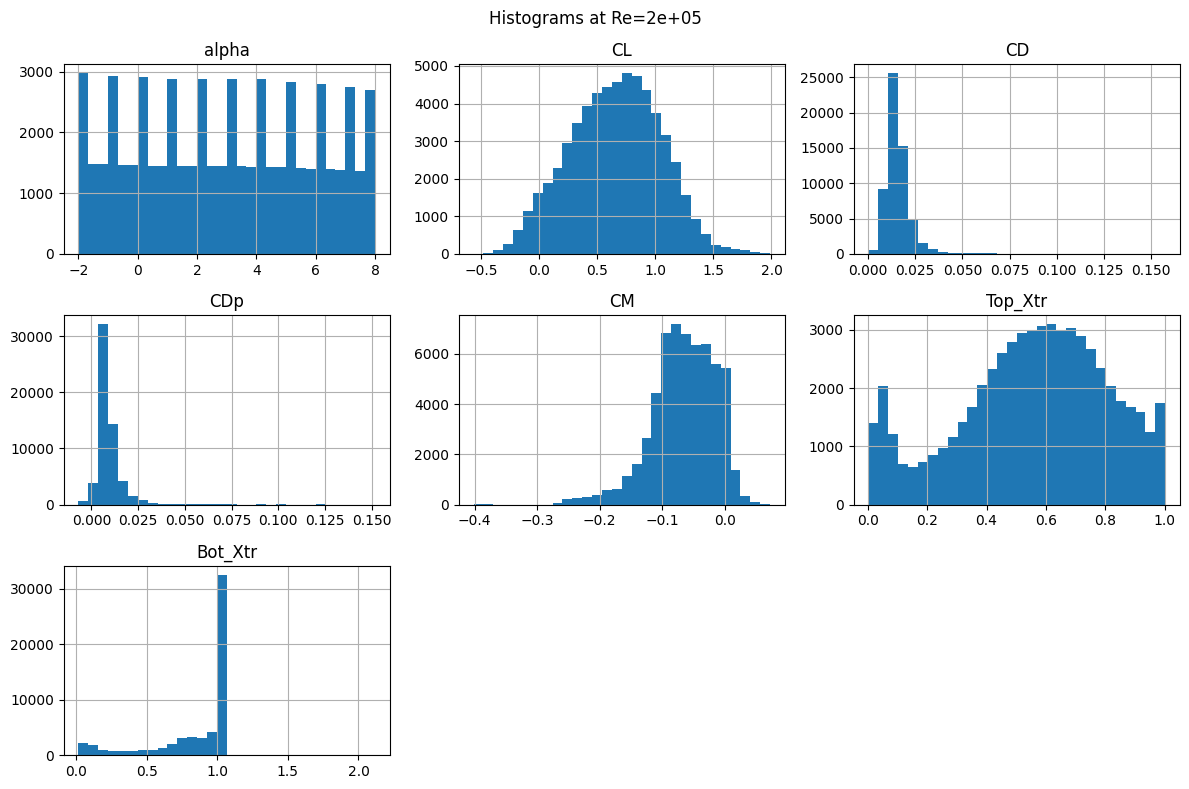

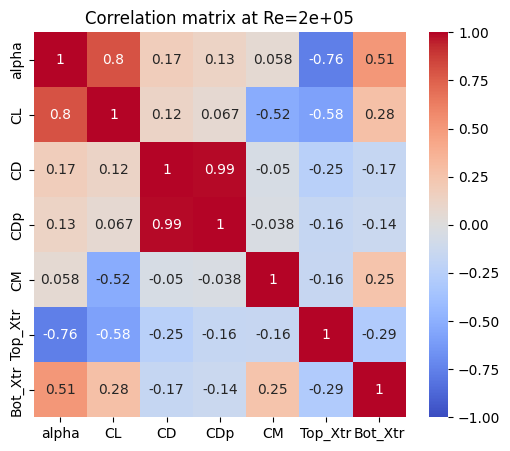

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # for correlation heatmap layout
# loop through Reynolds regimes
for Re_val in df['Re'].unique():
    sub = df[df['Re'] == Re_val]
    # 2a) Histograms for every numeric feature
    numeric_cols = ['alpha','CL','CD','CDp','CM','Top_Xtr','Bot_Xtr']
    sub[numeric_cols].hist(bins=30, figsize=(12,8))
    plt.suptitle(f'Histograms at Re={Re_val:.0e}')
    plt.tight_layout()
    plt.show()

    # 2b) Correlation matrix
    corr = sub[numeric_cols].corr()
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation matrix at Re={Re_val:.0e}')
    plt.show()

fig, ax = plt.subplots()
sub = df[(df.airfoil=='naca2412') & (df.Re==500000)]
ax.plot(sub.alpha, sub.Top_Xtr, label='Top_Xtr')
ax.plot(sub.alpha, sub.Bot_Xtr, label='Bot_Xtr')
ax.set(xlabel='α', ylabel='X_tr (chord fraction)',
       title='Transition Location vs α')
ax.legend()
plt.show()